# [Divide and Conquer, Sorting and Searching, and Randomized Algorithms - Week 2](https://www.coursera.org/learn/algorithms-divide-conquer/home/week/2)

## 其他版本
- [以 nbviewer 檢視](https://nbviewer.jupyter.org/github/johnnyasd12/algorithms-stanford/blob/master/Lec%201%20-%20Divide%20and%20Conquer%2C%20Sorting%20and%20Searching%2C%20and%20Randomized%20Algorithms/w2.ipynb) (LaTeX 的 render 較正確)

## [Week 2 Overview](https://www.coursera.org/learn/algorithms-divide-conquer/supplement/4JmFc/week-2-overview)
- **Divide and Conquer Algorithms**: The next set of lectures discusses three non-trivial examples of the divide and conquer algorithm design paradigm.
    1. **counting the number of inversions in an array**
        - This problem is related to measuring similarity between two ranked lists, which in turn is relevant for making good recommendations to someone based on your knowledge of their and others' preferences ("collaborative filtering").
    2. **Strassen's mind-blowing** recursive algorithm for **matrix multiplication**
        - improves over the obvious iterative method.
    3. computing **the closest pair of points in the plane**
        - this one is more advanced and is optional material.
- **The Master Method**: cover a "black-box" method for solving recurrences.
    - You can then **immediately determine the running time** of most of the **divide-and-conquer** algorithms that you'll ever see!

### Suggested Reading for Week 2
- *Algorithms Illuminated (Part 1)*, Chapters 3 and 4.

## III. Divide and Conquer Algorithms

### [O(n log n) Algorithm for Counting Inversions I](https://www.coursera.org/learn/algorithms-divide-conquer/lecture/GFmmJ/o-n-log-n-algorithm-for-counting-inversions-i)



#### The Divide and Conquer Paradigm
1. Divide into smaller sub-problems
2. Conquer via recursive calls
3. Combine solutions
    - 通常演算法獨創的地方大部分會發生在 combine solutions 這個 step。
        - 例如 merge sort 的 merge step。

#### The Problem
- Input: array $A$ containing $1,2,3,...,n$ in some arbitrary order
    - 其實 array 內容可以是任意不同的數字，不過為求方便我們就假設是 1 到 n
- Output: number of inversions = number of pairs $(i,j)$ of array indices with $i<j$ and $A[i]>A[j]$

#### Examples and Motivation
![](https://i.imgur.com/EaWo2s7.png)
- 連線的交點數量就是 inversion 的數量
- 那為何要計算 inversion 數量呢？
    - 某種意義上可以當成是**兩個 ranked list 的 dissimilarity**，例如：
        - 我把 6 部電影做喜好排序，123456，然後看我排第一的電影在我朋友眼中是排第幾(若以圖為例就是1)、我排第二的電影在我朋友眼中是排第4、我排第三的電影朋友排第2。依此類推得到朋友的排序是 135246，越多 inversion 就代表我和我朋友喜好越不一樣 (如果排序完全一樣，則 inversion 數量會是 0)，其實這個就是在做 **colaborative filtering**。

#### Quiz: Number of Inversions in an Array
What is the largest-possible number of inversions that element array can have?
- [x] 15
- [ ] 21
- [ ] 36
- [ ] 64

In general, $\binom n2 = n(n-1)/2$
- 因為所有 pairs 都是 inverted。


#### High-Level Approach
![](https://i.imgur.com/mTUt1uo.png)
- 我們把 inversion 分成三類
    1. Left inversion (只計算 array 左半邊的 inversion 數量)
    2. Right inversion (只計算 array 右半邊的 inversion 數量)
    3. Split inversion (只計算 $i,j$ 橫跨 array 左右的 inversion 數量)
- Left inversion 和 Right inversion 是可以用 recursive 方式計算的。
- 而 split inversion 就相當於之前說的 combine step 吧?

#### High-Level Algorithm
![](https://i.imgur.com/nwl8vjI.png)
- 我們希望在 recursion 之外的部分，只用 linear time 來完成
    - 回想當初 merge sort 可以在 $O(n\log n)$ 完成，就是因為 merge step 只花了 $O(n)$ 的複雜度。
    - 所以我們希望 `CountSplitInv(A,n)` 的複雜度是 $O(n)$。
    - 但是這是一個很 ambitious 的願望，**因為 split inversion 的數量 worst case 會是 quadratic times of $n$**，也就是說我們想在 $O(n)$ 的複雜度去計算可能有 $O(n^2)$ 的數量，辦的到嗎？可以。
        - 註：worst case 為何是 quadratic times? 若右方的 array 包含了數字 $1,2,...,\frac n2$；而左方的 array 包含了數字 $\frac n2 +1,...,n-1,n$，那麼所有的 split pair 都是 inversion，因此就有 quadratic times of $n$ 這麼多的 inversion。

### [O(n log n) Algorithm for Counting Inversions II](https://www.coursera.org/learn/algorithms-divide-conquer/lecture/IUiUk/o-n-log-n-algorithm-for-counting-inversions-ii)

#### Piggybacking on Merge Sort (Key Idea #2)
![](https://i.imgur.com/WAp54QC.png)
- piggyback [俚語]：當動詞時，常用這個片語，piggyback on sb/sth，指的是藉由其他已存在的靠山、情勢與環境等，謀取自己的好處等等。
- Key Idea #2：我們的 recursive calls 不只用來計算 inversions，也多一些 recursive calls 用來做 merge sort。
    - 何不呢？ merge sort 這麼快對不對 :)，$O(n\log n)$ 是我們要的啊，把 merge sort 加進來也不會變更複雜。

#### High-Level Algorithm (revised)
![](https://i.imgur.com/adkuAnX.png)
- 之前提過的 high-level algorithm，不過是修正版
    - 之前的 **`Count()` 變成 `SortAndCount()`**
    - 之前的 **`CountSplitInv()` 變成 `MergeAndCountSplitInv()`**
        - 既然我們已經知道 `Merge` 只需要花 $O(n)$，那麼要問的問題就是，在 merge 完得到 sorted array 之後是否也能在 $O(n)$ 得到 `CountSplitInv()`
- 修正後 pseudocode 應該長這樣 (不同於 slide)
    ```py
def SortAndCount(A, n):
    '''
    Args:
        A: array that we want to sort
        n: length of the array
    Return:
        D: sorted version of array A
        Ans: the total count of inversion
    '''
    if n==1: 
        return 0
    else:
        (B, X) = SortAndCount(A1, n/2) # A1 is 1st half of A; B is sorted A1
        (C, Y) = SortAndCount(A2, n/2) # A2 is 2nd half of A; C is sorted A2
        (D, Z) = MergeAndCountSplitInv(B, C, n) # this part is different from the slide
    Ans = X+Y+Z
    return D, Ans
    ```
    - 寫成這樣的原因是，我們希望 recursive call merge sort 之後，能夠幫助我們更容易做到 `CountSplitInv`。
        - 等等說明為何有幫助

#### Pseudocode for Merge
![](https://i.imgur.com/ip3dYPm.png)
- 左側的 array 是 $B$(slide 有誤)；右側 array 是 $C$
- 假設 input array $A$ 沒有 split inversions，會發生什麼事呢？

#### Quiz: Split Inversions
Suppose the input array $A$ has no split inversions. What is the relationship between the sorted subarrays $B$ and $C$
- [ ] $B$ has the smallest element of $A$, $C$ the second-smaller, $B$, the third-smallest, and so on. 
- [x] All elements of $B$ are less than all elements of $C$. 
- [ ] All elements of $B$ are greater than all elements of $C$. 
- [ ] There is not enough information to answwer this question. 


答案就是 $B$ 中的所有 element 都小於 $C$ 的所有 element
- 那麼對這樣的 $B$ 和 $C$ 做 merge，就只需要執行超簡單的操作即可完成：合併 $B$ 和 $C$，結束。
- ***這句不懂 "So, this suggests that, perhaps, copying elements over from the second sub-array C has something to do with the number of split inversions in the original array, and that is in fact the case."***


#### Example: Split Inversion & Merge Subroutine
![](https://i.imgur.com/hdzQdCJ.png)
- 假設 `B=[1,3,5]`，`C=[2,4,6]`，也就代表 no left/right inversions (all the inversions are split inversions)
    - 因為這裡有個前提是 `B` 和 `C` 是 sorted array
- 這時候的 merge subroutine會長怎樣？
    1. 當 2 被 copy 到 `D` 的時候，就可以發現 `(3,2)`、`(5,2)` 是 inversion
    2. 當 4 被 copy 到 `D` 的時候，就可以發現 `(5,4)` 是 inversion
- 結論：當我從 `C` 當中拿某個數字 `y` 到 `D` 裡面，這時 `B` 裡面的所有剩餘數字都會和 `y` 組成 inversion。

#### General Claim
- Claim
    - the split inversions involving an element $y$ of the 2nd array $C$ are precisely the numbers left in the 1st array $B$ when $y$ is copied to the output $D$. 
- Proof: 
    - Let $x$ be an element of the 1st array $B$. 
        1. if $x$ copied to output $D$ before $y$, then $x<y$. So no inversions involving $x$ and $y$. 
        2. if $y$ copied to output $D$ before $x$, then $y<x$. So $x$ and $y$ are a (split) inversion. Q.E.D. 
- 這個 part 是核心觀念，我們知道了為何 `CountSplitInv` 可以很容易地做到

#### Merge_and_CountSplitInv
![](https://i.imgur.com/tTl3AaH.png)
- 結論
    - 一邊做 merge 就可以一邊計算 split inversions 了。
    - subroutine 是 linear 的複雜度 ($O(n)$)
        - 這邊要注意，寫 $O(n)+O(n)=O(n)$ 有點太 sloppy(草率)了，事實上是因為這兩個 $O(n)$ 都是小於等於 「$n$ 的常數倍」，且只有 2 項相加所以才成立 $O(n)+O(n)=O(n)$。否則若有 $n$ 項 $O(n)$ 相加，就會變成 $O(n^2)$。

#### note 小結
總結來說，利用 merge sort 來做 count inversion，就可以把 left inversion 和 right inversion 都用 recursion 來解(順便 sort)，而 split inversion 是 linear time complexity，這樣就得到了和 merge sort 一樣的時間複雜度 $O(n\log n)$。

### [Strassen's Subcubic Matrix Multiplication Algorithm](https://www.coursera.org/learn/algorithms-divide-conquer/lecture/YXmYz/strassens-subcubic-matrix-multiplication-algorithm)

#### Matrix Multiplication
![](https://i.imgur.com/IBmTMze.png)
- 我們這邊姑且只討論方陣 ($n\times n$) 的相乘，因此 input size 是 $O(n^2)$
- 跟之前一樣希望 time complexity 越接近 linear 越好 (因此希望接近 $O(n^2)$)

#### Example (n=2)
$\begin{bmatrix}a&b\\c&d\end{bmatrix}\begin{bmatrix}e&f\\g&h\end{bmatrix} = \begin{bmatrix}ae+bg&af+bh\\ce+dg&cf+dh\end{bmatrix}$
- ***GitHub 在那邊亂 render ㄟ?***

#### Quiz:
![](https://i.imgur.com/UL6clPe.png)
- output size 是 $n^2$，而計算每個 element 所需運算量應該是 $2n$?
    - 細節：這邊我們假設我們表示 matrix 的方式可以用 $O(1)$ 的時間來存取 element，才成立上述情況。

#### The Divide and Conquer Paradigm
1. DIVIDE into smaller subproblems
2. CONQUER subproblems recursively
3. COMBINE solutions of the subproblems into one for the original problem

#### Applying Divide and Conquer
![](https://i.imgur.com/9xKhzZg.png)
- 怎麼用 divide and conquer 來做呢？若照之前教的，直覺上可能會把 matrix 拆成左右兩部分來 conquer，然而這樣就不是方陣了，沒辦法用 recursive call 來解，因此拆成四部分，這樣就都是方陣了。
- 然後就可以利用 [矩陣可先分割再相乘的特性](https://hackmd.io/Cza8BdpyTPeS9ppwdeg8HA#Augmentation-and-Partition) 來 conquer & combine 出答案。
    - conquer 的部分直接 recursive call 矩陣相乘
    - combine 的部分只需要矩陣相加，複雜度是 linear 的 ($O(n^2)$)

#### Recursive Algorithm #1
- Step 1: recursively compute the 8 necessary products
- Step 2: do the necessary additions $\theta(n^2)$ time
- Fact: run time is $\theta(n^3)$
    - 之後會利用 master method 來說明這個時間複雜度
    - 所以其實 recursive algorithm 跟直接用 iterative 硬幹的複雜度一樣 Orz
    - 那我們能不能像之前 integer multiplication 一樣用一些 clever 的 trick 來減少 recursive calls 的數量呢？

#### Strassen's Algorithm (1969)
- Step 1: recursively compute **only 7** (cleverly chosen) products
- Step 2: do the necessary (clever) additions + substractions (still $\theta(n^2)$ time) (使用聰明的方式做加減乘除)
- Fact: **better than cubic time!!**
    - 直覺上這樣好像只是比原本少了 1/8 的 time complexity？錯！
    - 因為每一層的所有 recursive calls 都可以少掉 1/8 的 time complexity，所以其實最後時間複雜度可以小於 $O(n^3)$
    - see Master Method lecture

#### The Details
![](https://i.imgur.com/qPBYQ25.png)
- 乾好扯喔所以 Strassen 到底是怎麼想到這 7 個 term 可以組出那 8 個東西的

### [O(n log n) Algorithm for Closest Pair I [Advanced - Optional]](https://www.coursera.org/learn/algorithms-divide-conquer/lecture/nf0jk/o-n-log-n-algorithm-for-closest-pair-i-advanced-optional)

- 待讀

### [O(n log n) Algorithm for Closest Pair II [Advanced - Optional]](https://www.coursera.org/learn/algorithms-divide-conquer/lecture/cER7y/o-n-log-n-algorithm-for-closest-pair-ii-advanced-optional)

- 待讀

## IV. The Master Method

### [Motivation](https://www.coursera.org/learn/algorithms-divide-conquer/lecture/olUPg/motivation)

#### Integer Multiplication Revisited
- **Motivation**: potentially useful algorithmic ideas often need mathematical analysis to evaluate
- **Recall**: grade-school multiplication algorithm uses $\theta(n^2)$ operation to multiply two n-digit numbers. 
- 這個部分會有更多數學，但之後很多分析可以受益於這個方法 (Master Method)

#### A Recursive Algorithm
回顧 integer multiplication
- Recursive approach
    - 把 $x$ 寫成 $10^{n/2}a+b$；把 $y$ 寫成 $10^{n/2}c+d$
    - 所以 $xy = 10^nac+10^{n/2}(ad+bc)+bd\tag{*}$
- **Algorithm #1**: recursively compute $ac,ad,bc,bd$ 然後就可以計算 (*)式了。
    - ![](https://i.imgur.com/N5p94q5.png)
    - **$T(n)$ = maximum number of operations (即 worst case) this algorithm needs to multiply two n-digit numbers**




#### A Better Recursive Algorithm
![](https://i.imgur.com/SzxgTq4.png)
- **Algorithm #2 (Gauss)**: recursively compute $ac, bd, (a+b)(c+d)$
    - recall $ad+bc = (a+b)(c+d)-ac-bd$
    - **New Recurrence**
        - **For all $n>1$**: $T(n)\le 3T(n/2)+O(n)$
            - 這邊這樣寫稍微草率，忽略了以下幾點：
                1. 其實在計算 $(a+b)(c+d)$ 的時候應該是 $T(n/2+1)$，不過不影響最終分析結果就是了
                2. $O(n)$ 的常數係數我們也完全忽略 (不過應該也沒差?)
                    - ***「事實上 Gauss's Algorithm 的 constant factor 比原本的 recursive algorithm (4次 recursive calls) 的 constant factor 還要大」(待證明)***
            - 可以思考一下 merge sort 應該可以寫成 $T(n)\le 2T(n/2)+O(n)$，而它的複雜度我們知道是 $O(n\log n)$，所以可以知道現在 Karatsuba Multiplication 的複雜度應該比 $O(n\log n)$ 要糟，但是糟多少呢？雖然我們現在只有一些線索，***But it will be one super-special case of the general master method, which we'll tackle next.(公殺挖歌??)***

### [Formal Statement](https://www.coursera.org/learn/algorithms-divide-conquer/lecture/HkcdO/formal-statement)

#### The Master Method (I)
- Cool Feature: a "black box" for solving recurrences. 
- Assumption: **all subproblems have equal size.**
    - 其實 master method 也有可以應付 imbalanced subproblem (例如前面的 optional video) 的 generalization，不過在本門課的討論範疇之外。

#### Recurrence Format
1. Base Case: 對於所有夠小的 $n$，$T(n)\le$ a constant
    - 這點幾乎對所有演算法都成立，沒什麼好說的
2. For all larger $n$：$T(n)\le aT(n/b)+O(n^d)$, where
    - a = number of recursive calls (>=1)
    - b = input size shrinkage factor (>1，這樣 recursive calls 才會停)
    - d = exponent in running time of "combine step" (>=0)
    - a,b,d 對 n 而言必須是常數
    - 這邊暫時不寫出 $O(n^d)$ 的常數係數，因為不是很重要，但是等等證明時會用到。
    - 但是 $d$ 就很重要了，決定 combine step 的複雜度。

#### The Master Method (II)
- The Master Method 也被稱作 **Master Theorem**
- $T(n)=\begin{cases}O(n^d\log n)&\text{if }a=b^d&\text{(case 1)}\\O(n^d)&\text{if }a<b^d&\text{(case 2)}\\O(n^{\log_ba})&\text{if }a>b^d&\text{(case 3)}\end{cases}$
- 後面的課就要來理解這個 Master Theorem 了
![](https://i.imgur.com/0kMUb5p.png)
- ***Now, a good exercise for you, to check if you really understand the proof of the master method after we go through it will be to show that if you strengthen the hypothesis and you assume the recurrence has the form T of n equals a times T of n over b plus theta of n to the d, then in fact, all three of these big-O's in the statement of the master method become thetas and the solution becomes asymptotically exact. 這段沒很懂 @@ 是要我們之後證明把 O 換成 Theta 也有同樣性質嗎?***

### [Examples](https://www.coursera.org/learn/algorithms-divide-conquer/lecture/Fkw1E/examples)

#### The Master Method (Review)
- If $T(n)\le aT(\frac nb)+O(n^d)$
- then 
    
    $T(n)=\begin{cases}O(n^d\log n)&\text{if }a=b^d&\text{(case 1)}\\O(n^d)&\text{if }a<b^d&\text{(case 2)}\\O(n^{\log_ba})&\text{if }a>b^d&\text{(case 3)}\end{cases}$

#### Example #1: Merge Sort
- $a=2,b=2,d=1$
- $b^d=a\implies$ Case 1
- $T(n)=O(n^d\log n)=O(n\log n)$

#### Quiz: Example #2 (Binary Search)
- Q: Where are the respective values of $a,b,d$ for a binary search of a sorted array, and which case of the Master Method does this correspond to?

- A: 1,2,0 [Case 1]
    - $a=b^d\implies T(n)=O(n^d\log n)=O(\log n)$

#### Example #3: Integer Multiplication Algorithm #1
- $a=4,b=2,d=1$
- $b^d=2<a$ (case 3)

    $\implies T(n)=O(n^{\log_ba})=O(n^2)$

#### Example #4
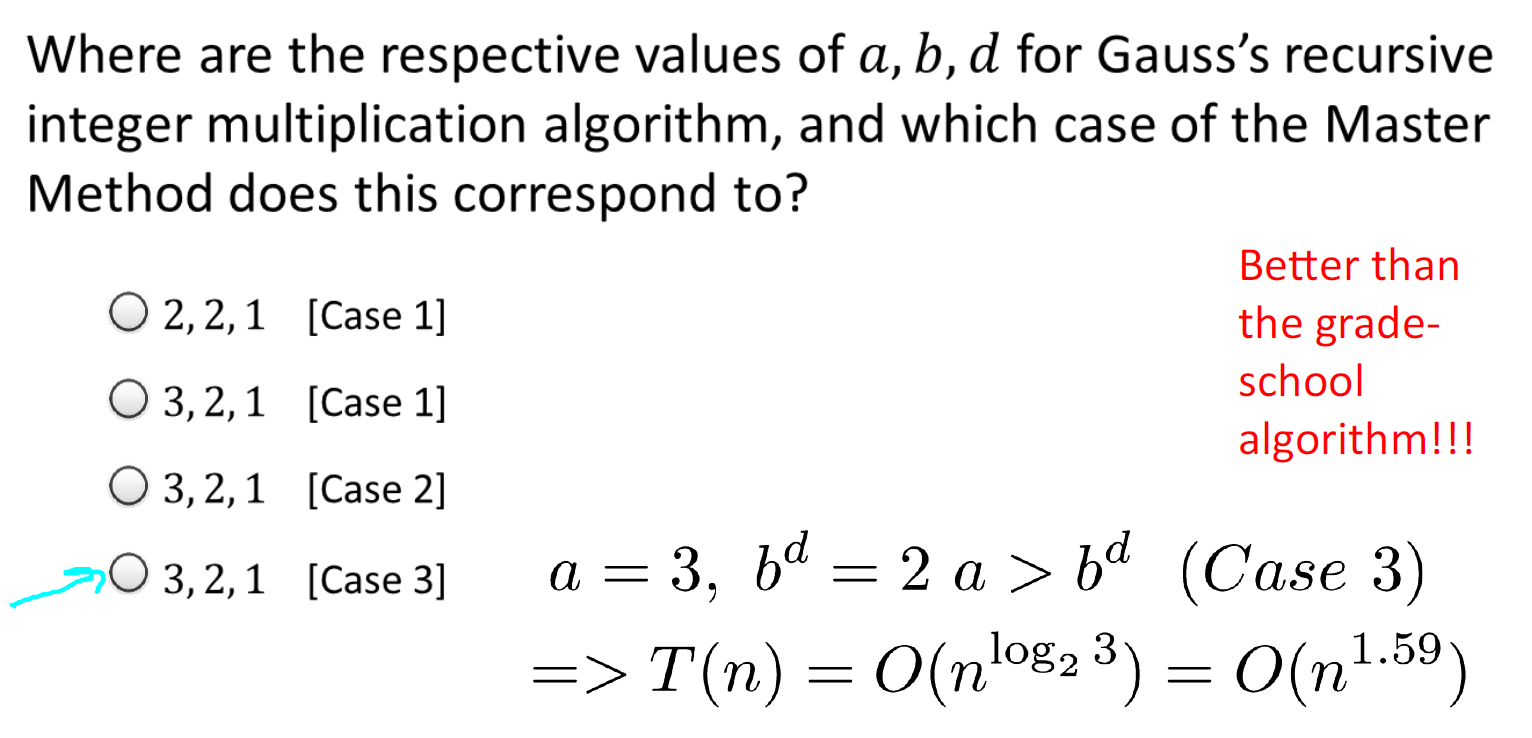

![](https://i.imgur.com/5KEZ96n.png)

#### Example #5 (Strassen's Matrix Multiplication Algorithm)

- $a=7, b=2, d=2$
- $b^d=4<a$ (case 3)
- $\implies T(n)=O(n^{\log_27})=O(n^{2.81})$
- beats the naïve iterative algorithm !

#### Example #6 (Fictitious Recurrence)
- 這啥?
- $T(n)\le 2T(n/2)+O(n^2)$
- $a=2,b=2,d=2$
- $b^d=4>a$ (case 2)
- $\implies T(n)=O(n^2)$